In [1]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random

In [2]:
# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Regularization  
    penalty = a**2 + b**2 + c**2 + d**2

    # Compute and print loss
    loss = np.square(y_pred - y).sum() + 1.0 * penalty
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 2021.842204383095
199 1432.931502296553
299 1016.3969179659524
399 721.7735330744873
499 513.3744740398934
599 365.9614913778377
699 261.6850399082482
799 187.92070908639658
899 135.7393515590202
999 98.8252490018055
1099 72.71106757437661
1199 54.23681502843298
1299 41.167197196143974
1399 31.920989500706177
1499 25.379625440952264
1599 20.75180959687099
1699 17.477754313048294
1799 15.1614414729189
1899 13.522706563060769
1999 12.36334358232323
Result: y = 0.05599971743701725 + 0.8545548203332635 x + -0.009660883097205843 x^2 + -0.09301944634181325 x^3


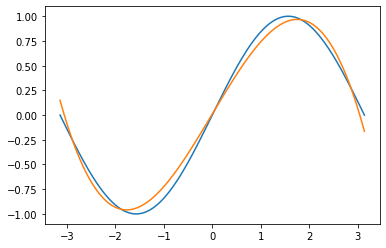

In [ ]:
na=4
coef=np.zeros(na)
coef[0]=a
coef[1]=b
coef[2]=c
coef[3]=d
     
def f(x,coef):
   out=coef[0]
   for j in range(na-1):
     out = out + coef[j+1] * x**(j+1)
   return(out)

plt.plot(x,y)
plt.plot(x,f(x,coef))

In [ ]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Regularization  
    penalty = a**2 + b**2 + c**2 + d**2

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()+penalty
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 tensor(1908.2683)
199 tensor(1265.8440)
299 tensor(840.7839)
399 tensor(559.5345)
499 tensor(373.4382)
599 tensor(250.3011)
699 tensor(168.8235)
799 tensor(114.9118)
899 tensor(79.2404)
999 tensor(55.6391)
1099 tensor(40.0247)
1199 tensor(29.6954)
1299 tensor(22.8632)
1399 tensor(18.3449)
1499 tensor(15.3575)
1599 tensor(13.3829)
1699 tensor(12.0783)
1799 tensor(11.2167)
1899 tensor(10.6481)
1999 tensor(10.2732)
Result: y = -0.0061510782688856125 + 0.8305774927139282 x + 0.0010611634934321046 x^2 + -0.08960887789726257 x^3


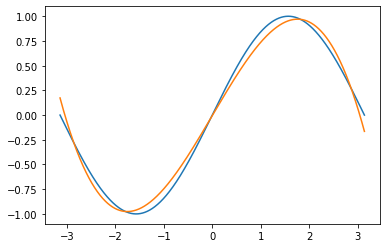

In [ ]:
na=4
coef=np.zeros(na)
coef[0]=a
coef[1]=b
coef[2]=c
coef[3]=d
     
def f(x,coef):
   out=coef[0]
   for j in range(na-1):
     out = out + coef[j+1] * x**(j+1)
   return(out)

plt.plot(x,y)
plt.plot(x,f(x,coef))

In [ ]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Regularization  
    penalty = a**2 + b**2 + c**2 + d**2

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum() + penalty
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 1420.700439453125
199 944.4490966796875
299 629.0263061523438
399 420.0920715332031
499 281.6754150390625
599 189.96153259277344
699 129.1828155517578
799 88.8976821899414
899 62.19099044799805
999 44.482566833496094
1099 32.738224029541016
1199 24.947540283203125
1299 19.778305053710938
1399 16.347576141357422
1499 14.070018768310547
1599 12.557652473449707
1699 11.553057670593262
1799 10.885541915893555
1899 10.441863059997559
1999 10.146831512451172
Result: y = -0.00848720595240593 + 0.8336896896362305 x + 0.0014641836751252413 x^2 + -0.09005165845155716 x^3


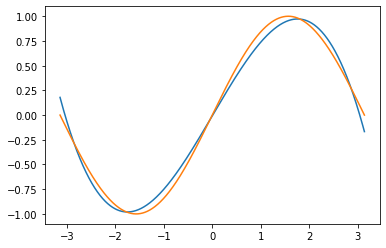

In [ ]:
def f(x):
   return(ai + bi * x + ci * x **2 + di * x **3)
ai=a.item()
bi=b.item()
ci=c.item()
di=d.item()
plt.plot(x,f(x))
plt.plot(x,y)

In [ ]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3, ..., x^na), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3, ..., , x^na).

na=3
a=np.arange(1,na+1,1)
p = torch.tensor(a)
input = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (na,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, na) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(na, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
optimizer = optim.SGD(model.parameters(), lr= learning_rate)
for t in range(2000):

    # Forward pass: compute predicted y by passing the input to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(input)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    optimizer.step()

#    with torch.no_grad():
#        for param in model.parameters():
#            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3'  )

99 271.87957763671875
199 186.92111206054688
299 129.528076171875
399 90.71766662597656
499 64.44590759277344
599 46.64350128173828
699 34.567012786865234
799 26.365943908691406
899 20.790491104125977
999 16.99578094482422
1099 14.410114288330078
1199 12.646329879760742
1299 11.441787719726562
1399 10.618219375610352
1499 10.054479598999023
1599 9.668145179748535
1699 9.403099060058594
1799 9.221051216125488
1899 9.095856666564941
1999 9.009675979614258
Result: y = -0.011856135912239552 + 0.848781168460846 x + 0.0020453794859349728 x^2 + -0.0921982005238533 x^3


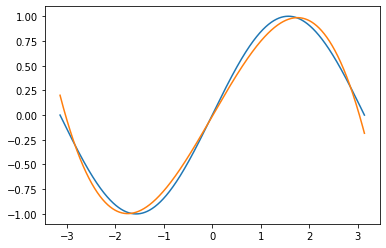

In [ ]:
coef=np.zeros(na+1)
coef[0]=linear_layer.bias.item()
for j in range(na):
     coef[j+1]=linear_layer.weight[:, j].item()
     
def f(x,coef):
   out=coef[0]
   for j in range(na):
     out = out + coef[j+1] * x**(j+1)
   return(out)

plt.plot(x,y)
plt.plot(x,f(x,coef))

Visualization with [torchviz](https://github.com/szagoruyko/pytorchviz)

In [ ]:
! pip install torchviz
from torchviz import make_dot

     |████████████████████████████████| 51kB 5.0MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3522 sha256=6f19d82f158bc31e1897c726f2c7bcc22662008ecbbcc984ef83da45552f0525
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [ ]:
res = model(input)

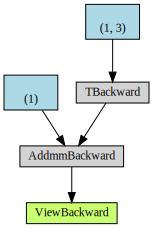

In [ ]:
make_dot(res)

Visualization with [hiddenlayer](https://github.com/waleedka/hiddenlayer)

In [ ]:
!pip install hiddenlayer

In [ ]:
import hiddenlayer as hl

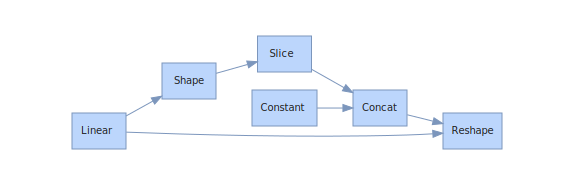

In [ ]:
hl_graph=hl.build_graph(model, input)
hl_graph.theme = hl.graph.THEMES["blue"].copy()  # Two options: basic and blue
hl_graph

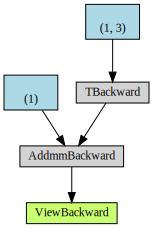

In [ ]:
make_dot(model(input))

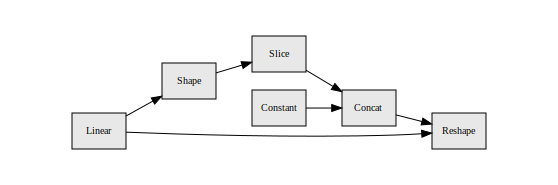

In [ ]:
hl.build_graph(model, input)

# Torch tensor

The pytorch tensor class involves two attribute variables (*i.e*., two data containers), including one with the elements of the tensor, analogous to a numpy multidimensional array, and the other container with the gradients of an input function with respect to the tensor elements. In addition, the tensor class involves the attribute 'backward' method for the so-called *backward propagation* that computes the gradients of input function with respect to the elements of the tensor.

In [ ]:
r = torch.ones((2,2), requires_grad=True)
p = torch.ones((2,2), requires_grad=True)
p2 = p+p
print("r=",r)
print("p=",p)
print("p2=",p2)

r= tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
p= tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
p2= tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)


Simple example of how the method backwards computes the derivative of the function with respect to the variables

In [ ]:
y=(r+2)+p2
z=y*y*3
out = z.mean()

print('before backward: r.grad=', r.grad)

before backward: r.grad= None


In [ ]:
out.backward()
print('after backward: r.grad=', r.grad)

after backward: r.grad= tensor([[7.5000, 7.5000],
        [7.5000, 7.5000]])


In [ ]:
print(p.grad)

tensor([[15., 15.],
        [15., 15.]])


Comparison of numpy and pytorch tensors

In [ ]:
nt=np.ones((2,2))
print(nt)

[[1. 1.]
 [1. 1.]]


In [ ]:
pn = torch.ones((2,2), requires_grad=True)
print(pn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
pnn= torch.tensor(nt,requires_grad=True)
print(pnn)

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64, requires_grad=True)
